## **MNIST**

In [30]:

import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
from skimage.io import imread

In [31]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [32]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [33]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [34]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)


In [35]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

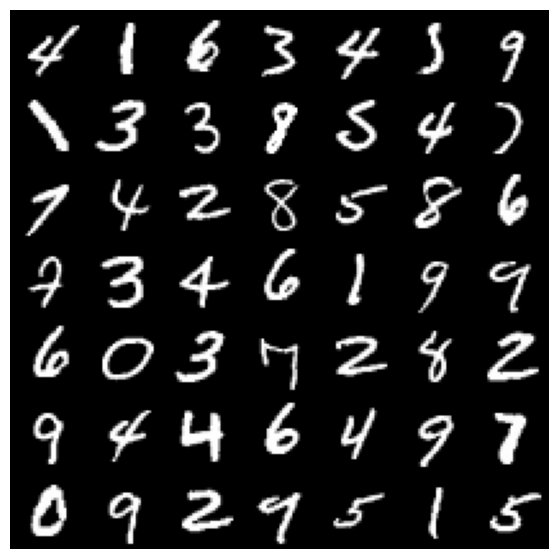

In [36]:
montage_plot(X[127:176,0,:,:])

## **y=mx using MNIST**

In [8]:
X = X.reshape(X.shape[0],784) # Reshape image data from (6000, 1, )
X_test = X_test.reshape(X_test.shape[0],784)  # Reshape image test data tensor

In [9]:
X.shape

(60000, 784)

In [10]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [11]:
X

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [12]:
X.shape

torch.Size([60000, 784])

In [13]:
X = X.T

In [14]:
X.shape

torch.Size([784, 60000])

In [15]:
M = GPU(np.random.rand(10,784))

In [16]:
x = X[:,0:64]

In [17]:
y = M@x

In [18]:
batch_size = 64

x = X[:,0:batch_size]

M = GPU(np.random.rand(10,784))

y = M@x

y = torch.argmax(y,0)

torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.1719, device='cuda:0')

## **Random Walk**

In [19]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.09626666456460953
0.11063333600759506
0.1122666671872139
0.13961666822433472
0.1399500072002411
0.14448332786560059
0.1509166657924652
0.15111666917800903
0.16324999928474426
0.16493333876132965
0.16545000672340393
0.1682666689157486
0.1727166622877121
0.17395000159740448
0.17531666159629822
0.1940000057220459
0.19761666655540466
0.19926667213439941
0.20641666650772095
0.20995000004768372
0.21156667172908783
0.21601666510105133
0.22179999947547913
0.22296667098999023
0.22358334064483643
0.22580000758171082
0.22853334248065948
0.23528333008289337
0.23624999821186066
0.23981666564941406
0.2430500090122223
0.2436833381652832
0.24748334288597107
0.24808333814144135
0.251066654920578
0.2589833438396454
0.25901666283607483
0.25940001010894775
0.26543334126472473
0.27178332209587097
0.2722833454608917
0.27763333916664124
0.2811500132083893
0.28183335065841675
0.2833999991416931
0.2842000126838684
0.28691667318344116
0.2874999940395355
0.2914000153541565
0.29170000553131104
0.293516665697097

KeyboardInterrupt: ignored